# Multiple Linear Regression

## Prediction of Car Prices

#### Problem Statement
A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts. 
They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market.

The company wants to know:

- Which variables are significant in predicting the price of a car
- How well those variables describe the price of a car
- Based on various market surveys, the consulting firm has gathered a large dataset of different types of cars across the Americal market.

**so interpretation is important**

## Step 1: Data understanding and exploration
let import the NumPy and Pandas to read the data-set

In [122]:
# Supress warnings


import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from matplotlib.pyplot import xticks

In [3]:
#head of dataset

CarPrices = pd.read_csv("C:/Users/Vishnu Kant Shukla/Desktop/B.tech/upGrad/Assignments of upGrad/car prices predction using ML/CarPrice_Assignment.csv")
CarPrices.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


various aspects of data set

In [4]:
CarPrices.shape

(205, 26)

In [126]:
CarPrices.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

as we can see from above we don't have any missing values in our data set

let's generate descriptive statistics that summarize the central tendency, dispersion and shape of a dataset's distribution with help of describe()

In [127]:
CarPrices.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


## Step 2: Data Cleaning and preparation
for improving the data quality and in doing so, increaing overall productivity

In [5]:
CarPrices['car_ID'].is_unique

True

In [6]:
# as we can see Car_ID is unques in data set, we can use it as index for better presentation

CarPrices = CarPrices.set_index('car_ID')

In [7]:
CarPrices.dtypes

symboling             int64
CarName              object
fueltype             object
aspiration           object
doornumber           object
carbody              object
drivewheel           object
enginelocation       object
wheelbase           float64
carlength           float64
carwidth            float64
carheight           float64
curbweight            int64
enginetype           object
cylindernumber       object
enginesize            int64
fuelsystem           object
boreratio           float64
stroke              float64
compressionratio    float64
horsepower            int64
peakrpm               int64
citympg               int64
highwaympg            int64
price               float64
dtype: object

In [8]:
CarPrices[['wheelbase','carlength','carwidth','carheight','boreratio','stroke','compressionratio','price']] = CarPrices[['wheelbase','carlength','carwidth','carheight','boreratio','stroke','compressionratio','price']].astype(int)
print(CarPrices.dtypes)

symboling            int64
CarName             object
fueltype            object
aspiration          object
doornumber          object
carbody             object
drivewheel          object
enginelocation      object
wheelbase            int32
carlength            int32
carwidth             int32
carheight            int32
curbweight           int64
enginetype          object
cylindernumber      object
enginesize           int64
fuelsystem          object
boreratio            int32
stroke               int32
compressionratio     int32
horsepower           int64
peakrpm              int64
citympg              int64
highwaympg           int64
price                int32
dtype: object


In [9]:
# let's remove the model name as it is not usefull
CarPrices['CarName'] = CarPrices.CarName.str.split(' ').str.get(0).str.upper()
print(CarPrices.CarName)

car_ID
1      ALFA-ROMERO
2      ALFA-ROMERO
3      ALFA-ROMERO
4             AUDI
5             AUDI
6             AUDI
7             AUDI
8             AUDI
9             AUDI
10            AUDI
11             BMW
12             BMW
13             BMW
14             BMW
15             BMW
16             BMW
17             BMW
18             BMW
19       CHEVROLET
20       CHEVROLET
21       CHEVROLET
22           DODGE
23           DODGE
24           DODGE
25           DODGE
26           DODGE
27           DODGE
28           DODGE
29           DODGE
30           DODGE
          ...     
176         TOYOTA
177         TOYOTA
178         TOYOTA
179         TOYOTA
180         TOYOTA
181         TOYOTA
182        TOYOUTA
183      VOKSWAGEN
184     VOLKSWAGEN
185     VOLKSWAGEN
186     VOLKSWAGEN
187     VOLKSWAGEN
188     VOLKSWAGEN
189     VOLKSWAGEN
190             VW
191             VW
192     VOLKSWAGEN
193     VOLKSWAGEN
194     VOLKSWAGEN
195          VOLVO
196          VOLVO
197  

In [10]:
CarPrices.columns

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
       'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
       'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
       'horsepower', 'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [11]:
#checking for NaN values in our data set

pd.isnull('CarPrices')

False

#### Exploratory Data Analysis ( EDA )
Target variable = Price

In [12]:
CarPrices.price.describe()

count      205.000000
mean     13276.702439
std       7988.848977
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

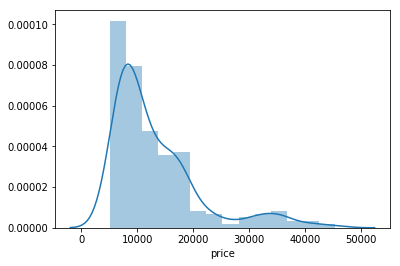

In [13]:
sns.distplot(CarPrices.price)

#####  Let's see the count of automobile in each category and percent share of each category
symboling : Its assigned insurance risk rating
             A value of +3 indicates that the auto is risky,
             -3 that it is probably pretty safe.(Categorical)

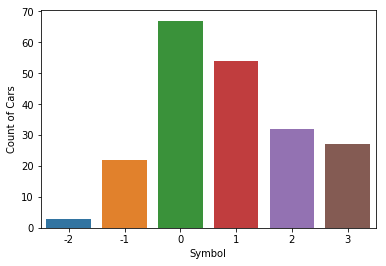

<Figure size 432x288 with 0 Axes>

In [14]:
#symboling : Its assigned insurance risk rating
#A value of +3 indicates that the auto is risky,
#-3 that it is probably pretty safe.(Categorical)


plt1 = sns.countplot(CarPrices['symboling'])
plt1.set(xlabel = 'Symbol', ylabel= 'Count of Cars')
plt.show()
plt.tight_layout()

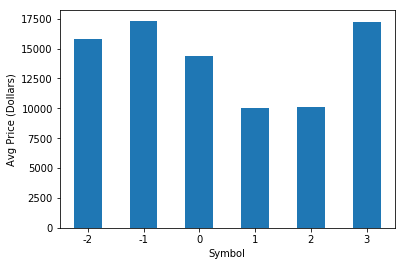

In [15]:
# now we see the average price of each symobolic cars

plt1 = CarPrices[['symboling','price']].groupby("symboling").mean().plot(kind='bar',legend = False,)
plt1.set_xlabel("Symbol")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

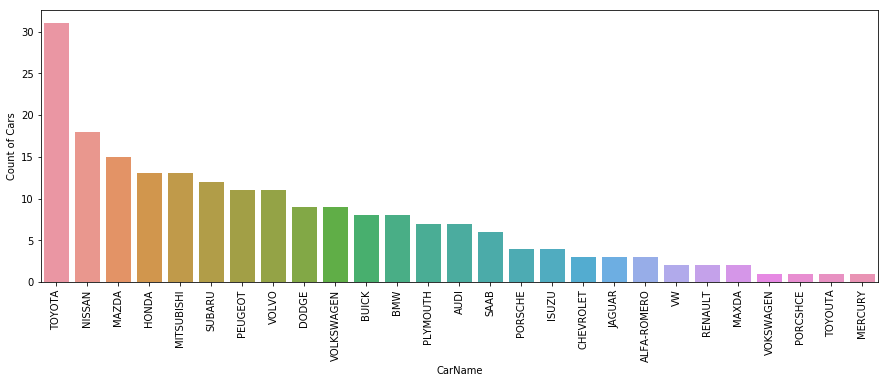

<Figure size 432x288 with 0 Axes>

In [16]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(CarPrices['CarName'], order=pd.value_counts(CarPrices['CarName']).index,)
plt1.set(xlabel = 'CarName', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [18]:
print(CarPrices['CarName'].value_counts())

TOYOTA         31
NISSAN         18
MAZDA          15
HONDA          13
MITSUBISHI     13
SUBARU         12
PEUGEOT        11
VOLVO          11
DODGE           9
VOLKSWAGEN      9
BUICK           8
BMW             8
PLYMOUTH        7
AUDI            7
SAAB            6
PORSCHE         4
ISUZU           4
CHEVROLET       3
JAGUAR          3
ALFA-ROMERO     3
VW              2
RENAULT         2
MAXDA           2
VOKSWAGEN       1
PORCSHCE        1
TOYOUTA         1
MERCURY         1
Name: CarName, dtype: int64


In [19]:
# It's noticed that in brand names,
# VOLKSWAGON has three different values as VOLKSWAGEN, VOKSWAGEN and VW
# MAZDA is also spelled as MAXDA
# PORSCHE as PORSCHE and PORCSCHE.
# Let's fix these data issues.


CarPrices['CarName'] = CarPrices['CarName'].replace(['VW', 'VOKSWAGEN'], 'VOLKSWAGEN')
CarPrices['CarName'] = CarPrices['CarName'].replace(['MAXDA'], 'MAZDA')
CarPrices['CarName'] = CarPrices['CarName'].replace(['PORCSHCE'], 'PORSCHE')
CarPrices['CarName'] = CarPrices['CarName'].replace(['TOYOUTA'], 'TOYOTA')

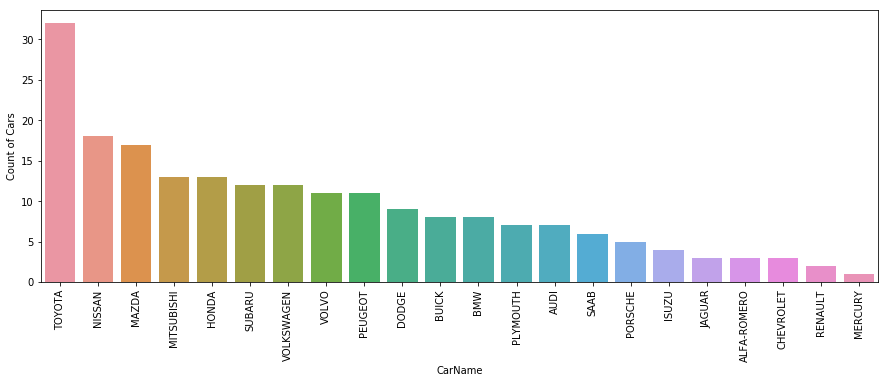

<Figure size 432x288 with 0 Axes>

In [20]:
fig, ax = plt.subplots(figsize = (15,5))
plt1 = sns.countplot(CarPrices['CarName'], order=pd.value_counts(CarPrices['CarName']).index,)
plt1.set(xlabel = 'CarName', ylabel= 'Count of Cars')
xticks(rotation = 90)
plt.show()
plt.tight_layout()

In [21]:
CarPrices.CarName.describe()

count        205
unique        22
top       TOYOTA
freq          32
Name: CarName, dtype: object

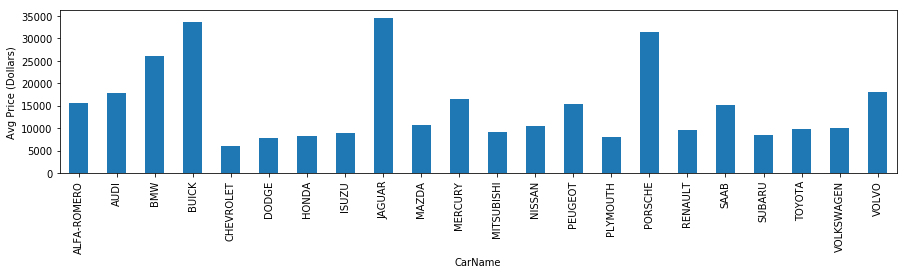

In [22]:
# Average car prices each company


df_comp_avg_price = CarPrices[['CarName','price']].groupby("CarName", as_index = False).mean().rename(columns={'price':'Car_avg_price'})
plt1 = df_comp_avg_price.plot(x = 'CarName', kind='bar',legend = False, sort_columns = True, figsize = (15,3))
plt1.set_xlabel("CarName")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 90)
plt.show()

In [23]:
CarPrices = CarPrices.merge(df_comp_avg_price, on = 'CarName')
CarPrices['price_category'] = CarPrices['Car_avg_price'].apply(lambda x : 'Budget' if x < 10000 else ('Mid_Range' if 10000 <= x < 20000 else "Luxury"))
CarPrices.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,Car_avg_price,price_category
0,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88,168,...,3,2,9,111,5000,21,27,13495,15498.333333,Mid_Range
1,3,ALFA-ROMERO,gas,std,two,convertible,rwd,front,88,168,...,3,2,9,111,5000,21,27,16500,15498.333333,Mid_Range
2,1,ALFA-ROMERO,gas,std,two,hatchback,rwd,front,94,171,...,2,3,9,154,5000,19,26,16500,15498.333333,Mid_Range
3,2,AUDI,gas,std,four,sedan,fwd,front,99,176,...,3,3,10,102,5500,24,30,13950,17859.142857,Mid_Range
4,2,AUDI,gas,std,four,sedan,4wd,front,99,176,...,3,3,8,115,5500,18,22,17450,17859.142857,Mid_Range


##### Now, we're going to see how each features efects to price

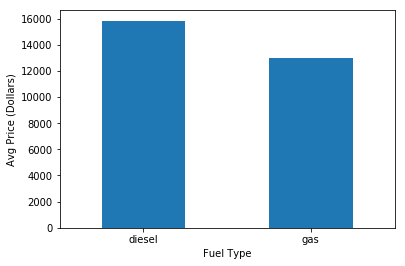

In [24]:
# fuel type


df_fuel_car_avg = CarPrices[['fueltype','price']].groupby("fueltype", as_index = False).mean().rename(columns={'price':'fuel_avg_price'})
plt1 = df_fuel_car_avg.plot(x = 'fueltype', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Fuel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

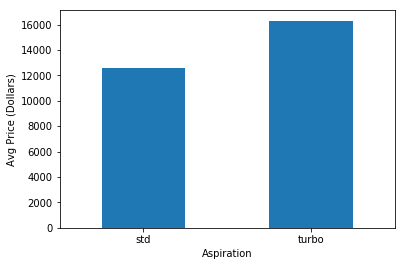

In [25]:
# asipriation


df_aspir_avg_price = CarPrices[['aspiration','price']].groupby("aspiration", as_index = False).mean().rename(columns={'price':'aspir_avg_price'})
plt1 = df_aspir_avg_price.plot(x = 'aspiration', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Aspiration")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

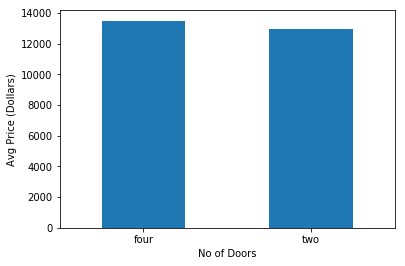

In [26]:
# door number


df_door_avg_price = CarPrices[['doornumber','price']].groupby("doornumber", as_index = False).mean().rename(columns={'price':'door_avg_price'})
plt1 = df_door_avg_price.plot(x = 'doornumber', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("No of Doors")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

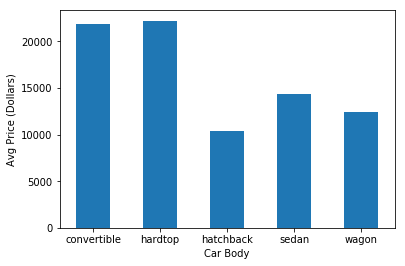

In [27]:
# car body


df_body_avg_price = CarPrices[['carbody','price']].groupby("carbody", as_index = False).mean().rename(columns={'price':'carbody_avg_price'})
plt1 = df_body_avg_price.plot(x = 'carbody', kind='bar',legend = False, sort_columns = True)
plt1.set_xlabel("Car Body")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

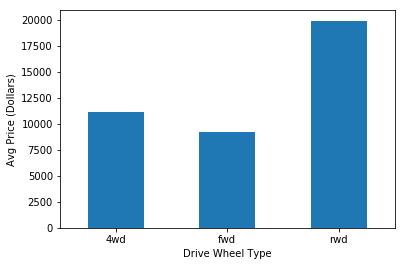

In [28]:
# drivewheel


df_drivewheel_avg_price = CarPrices[['drivewheel','price']].groupby("drivewheel", as_index = False).mean().rename(columns={'price':'drivewheel_avg_price'})
plt1 = df_drivewheel_avg_price.plot(x = 'drivewheel', kind='bar', sort_columns = True,legend = False,)
plt1.set_xlabel("Drive Wheel Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

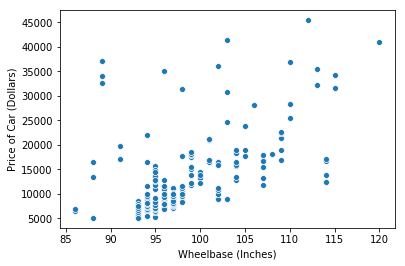

In [29]:
# wheelbase


plt1 = sns.scatterplot(x = 'wheelbase', y = 'price', data = CarPrices)
plt1.set_xlabel('Wheelbase (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

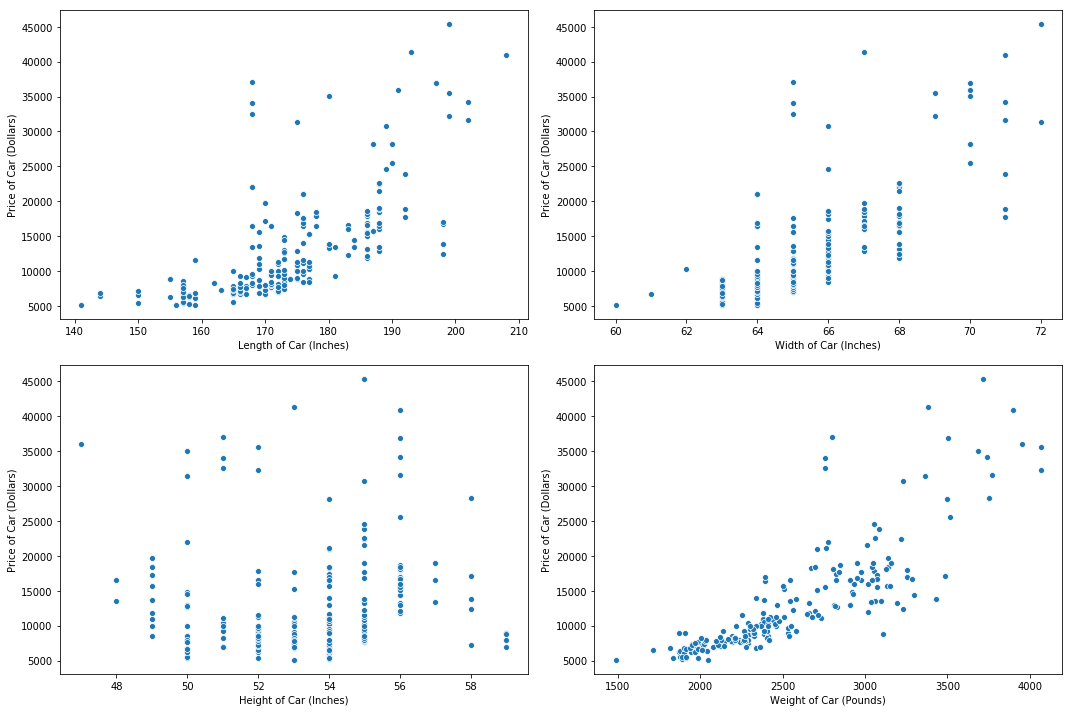

In [30]:
# Car dimension
# let's see how prices effected by car's length, height, and width



fig, axs = plt.subplots(2,2,figsize=(15,10))
plt1 = sns.scatterplot(x = 'carlength', y = 'price', data = CarPrices, ax = axs[0,0])
plt1.set_xlabel('Length of Car (Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
plt2 = sns.scatterplot(x = 'carwidth', y = 'price', data = CarPrices, ax = axs[0,1])
plt2.set_xlabel('Width of Car (Inches)')
plt2.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'carheight', y = 'price', data = CarPrices, ax = axs[1,0])
plt3.set_xlabel('Height of Car (Inches)')
plt3.set_ylabel('Price of Car (Dollars)')
plt3 = sns.scatterplot(x = 'curbweight', y = 'price', data = CarPrices, ax = axs[1,1])
plt3.set_xlabel('Weight of Car (Pounds)')
plt3.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()

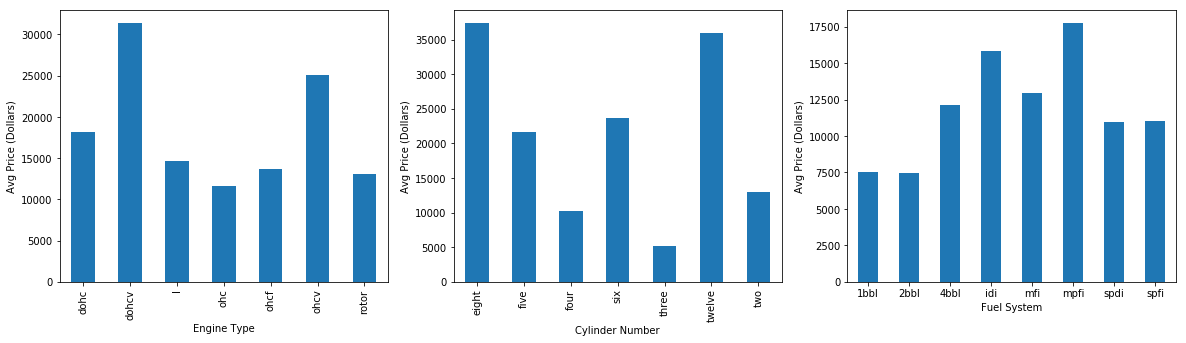

In [31]:
# Engine specifications i.e Engine type, fuel system, and number of cylinders


fig, axs = plt.subplots(1,3,figsize=(20,5))
#
df_engine_avg_price = CarPrices[['enginetype','price']].groupby("enginetype", as_index = False).mean().rename(columns={'price':'engine_avg_price'})
plt1 = df_engine_avg_price.plot(x = 'enginetype', kind='bar', sort_columns = True, legend = False, ax = axs[0])
plt1.set_xlabel("Engine Type")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_cylindernumber_avg_price = CarPrices[['cylindernumber','price']].groupby("cylindernumber", as_index = False).mean().rename(columns={'price':'cylindernumber_avg_price'})
plt1 = df_cylindernumber_avg_price.plot(x = 'cylindernumber', kind='bar', sort_columns = True,legend = False, ax = axs[1])
plt1.set_xlabel("Cylinder Number")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
#
df_fuelsystem_avg_price = CarPrices[['fuelsystem','price']].groupby("fuelsystem", as_index = False).mean().rename(columns={'price':'fuelsystem_avg_price'})
plt1 = df_fuelsystem_avg_price.plot(x = 'fuelsystem', kind='bar', sort_columns = True,legend = False, ax = axs[2])
plt1.set_xlabel("Fuel System")
plt1.set_ylabel("Avg Price (Dollars)")
xticks(rotation = 0)
plt.show()

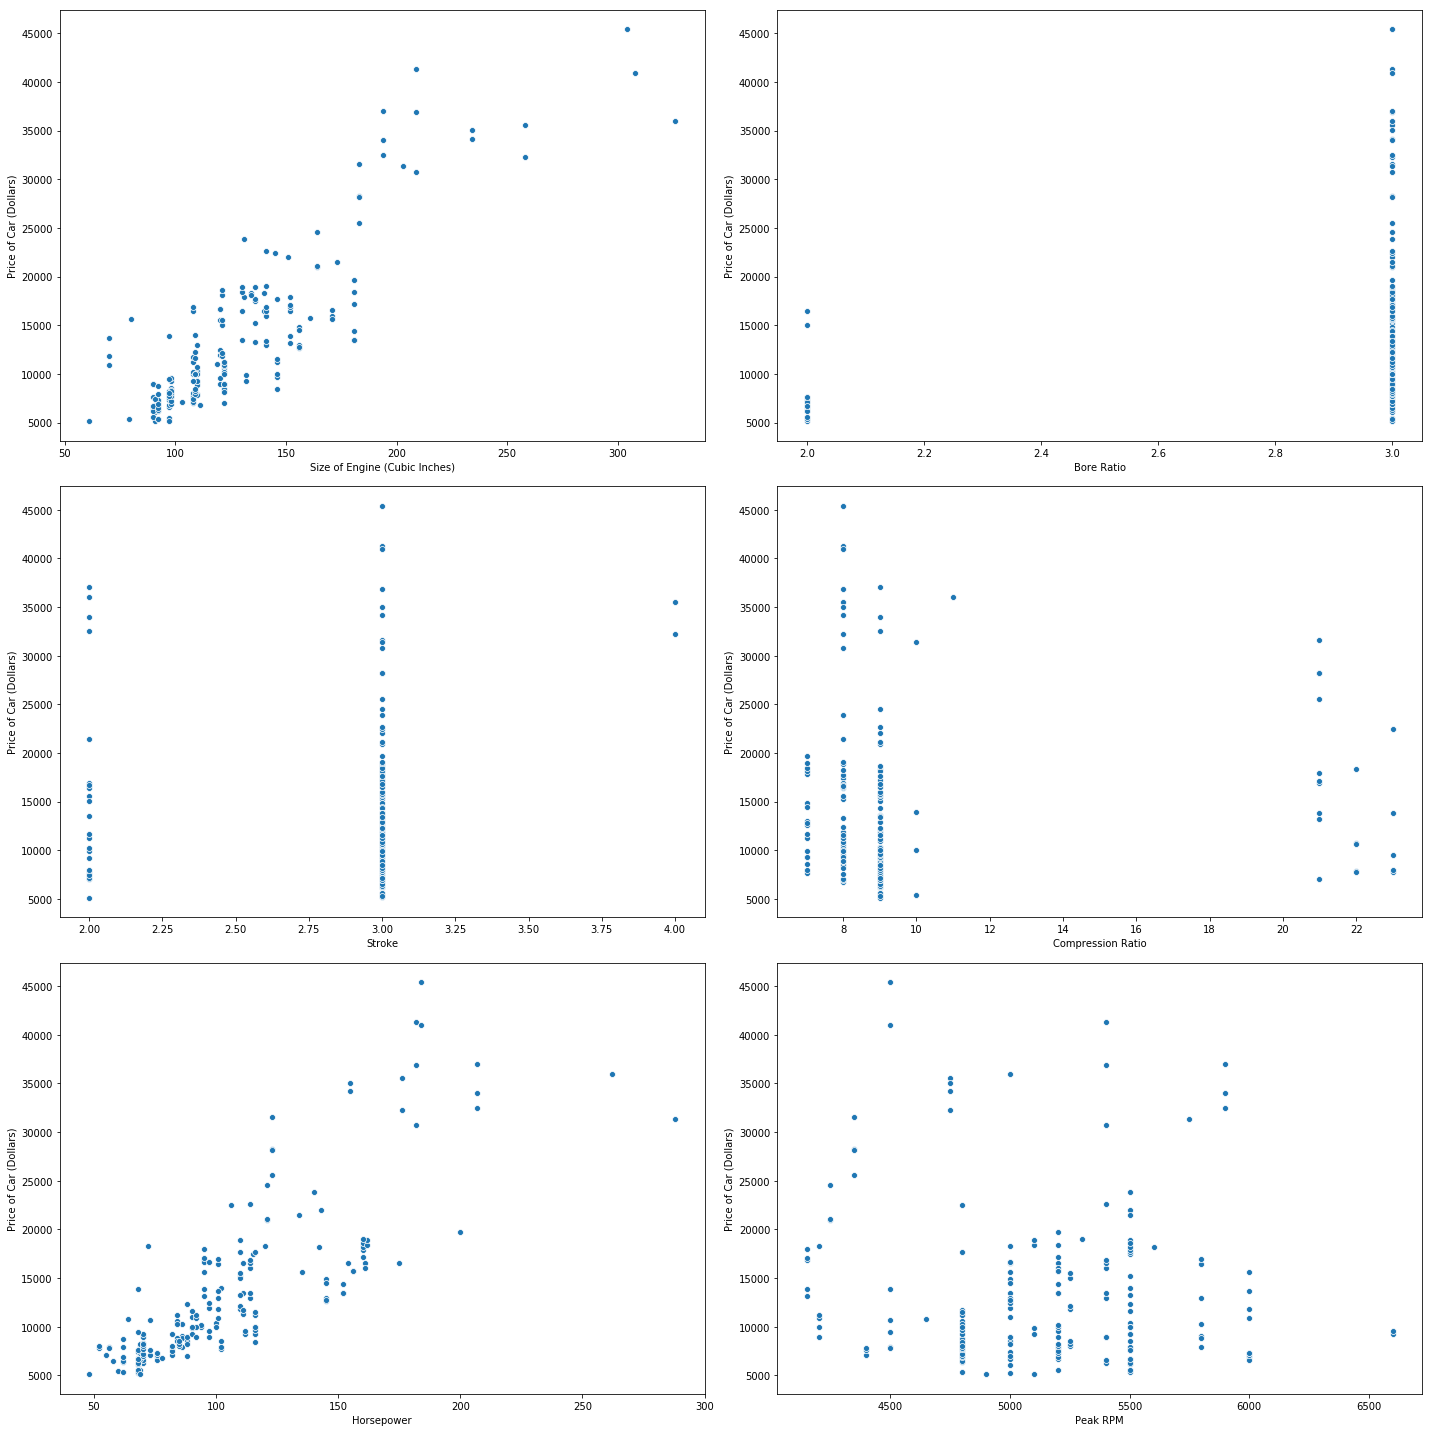

In [33]:
# Engine Size, Bore Ratio, Stroke, Horsepower & Compression Ratio



fig, axs = plt.subplots(3,2,figsize=(20,20))
#
plt1 = sns.scatterplot(x = 'enginesize', y = 'price', data = CarPrices, ax = axs[0,0])
plt1.set_xlabel('Size of Engine (Cubic Inches)')
plt1.set_ylabel('Price of Car (Dollars)')
#
plt2 = sns.scatterplot(x = 'boreratio', y = 'price', data = CarPrices, ax = axs[0,1])
plt2.set_xlabel('Bore Ratio')
plt2.set_ylabel('Price of Car (Dollars)')
#
plt3 = sns.scatterplot(x = 'stroke', y = 'price', data = CarPrices, ax = axs[1,0])
plt3.set_xlabel('Stroke')
plt3.set_ylabel('Price of Car (Dollars)')
#
plt4 = sns.scatterplot(x = 'compressionratio', y = 'price', data = CarPrices, ax = axs[1,1])
plt4.set_xlabel('Compression Ratio')
plt4.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'horsepower', y = 'price', data = CarPrices, ax = axs[2,0])
plt5.set_xlabel('Horsepower')
plt5.set_ylabel('Price of Car (Dollars)')
#
plt5 = sns.scatterplot(x = 'peakrpm', y = 'price', data = CarPrices, ax = axs[2,1])
plt5.set_xlabel('Peak RPM')
plt5.set_ylabel('Price of Car (Dollars)')
plt.tight_layout()
plt.show()

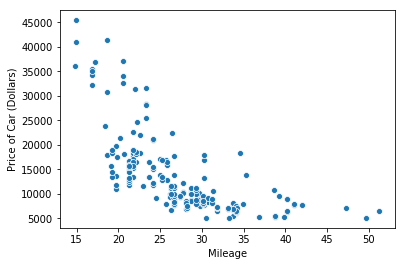

In [34]:
# City Mileage and Highway Mileage


# A single variable mileage can be calculated taking the weighted average of 55% city and 45% highways.
CarPrices['mileage'] = CarPrices['citympg']*0.55 + CarPrices['highwaympg']*0.45

# Let's see how price varies with Mileage
plt1 = sns.scatterplot(x = 'mileage', y = 'price', data = CarPrices)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

##### Let's do some handson with Bivariate analysis

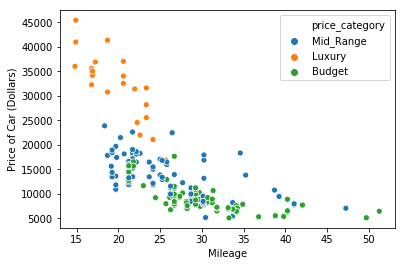

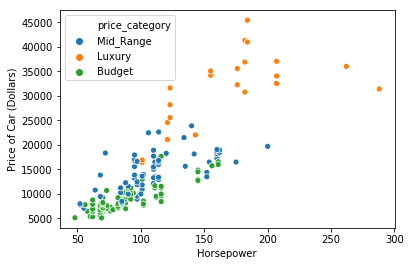

In [39]:
# It is expected that luxury Brand doesn't care much about Mileage.
# Let's see how Car's category and Mileage effects to prices


# # Car's prices category ---- Horsepower
plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'price_category', data = CarPrices)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()


# Car's prices category ---- Horsepower
plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'price_category', data = CarPrices)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

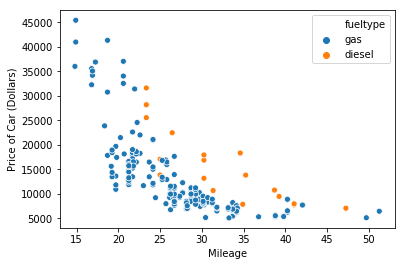

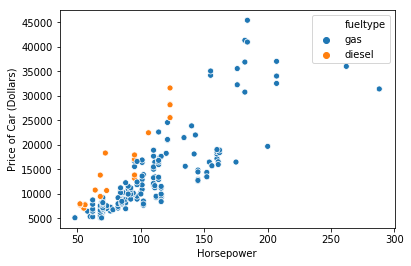

In [40]:
# mileage------- fuel type

plt1 = sns.scatterplot(x = 'mileage', y = 'price', hue = 'fueltype', data = CarPrices)
plt1.set_xlabel('Mileage')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()


# Horsepower ------- fuel type

plt1 = sns.scatterplot(x = 'horsepower', y = 'price', hue = 'fueltype', data = CarPrices)
plt1.set_xlabel('Horsepower')
plt1.set_ylabel('Price of Car (Dollars)')
plt.show()

###### Conclusion from the above analysis
- As we saw there is some useful variables that varies with car prices and some are not much effects.
- So, we can filter out those who actually gonna mean to me
- Some of these are given below
`Price Category`, `Fuel Type`, `Aspiration`, `Car Body`, `Drive Wheel`, `Wheelbase`, `Car Length`, `Car Width`, `Curb weight`, 
`Engine Type`, `Cylinder Number`, `Engine Size`, `Bore Ratio`, `Horsepower`, `Mileage`.

##### Visualizing the data

Let's now spend some time doing what is arguably the most important step - **understanding the data**.
- If there is some obvious multicollinearity going on, this is the first place to catch it
- Here's where you'll also identify if some predictors directly have a strong association with the outcome variable

We'll visualise our data using `matplotlib` and `seaborn`.

###### Visualize numeric variables
let's make a pairpolt for all the numeric variables

In [44]:
''' Beofoe jumping to the next assessments i make sure merely consider to those variable which have
we saw there is correlation with price..
So, firts make a dataframe of those'''

automobile = CarPrices[['fueltype', 'aspiration', 'carbody', 'drivewheel', 'wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize',  'boreratio', 'horsepower', 'price', 'price_category', 'mileage']]
automobile.head()

,fueltype,aspiration,carbody,drivewheel,wheelbase,carlength,carwidth,curbweight,enginetype,cylindernumber,enginesize,boreratio,horsepower,price,price_category,mileage
0,gas,std,convertible,rwd,88,168,64,2548,dohc,four,130,3,111,13495,Mid_Range,23.70
1,gas,std,convertible,rwd,88,168,64,2548,dohc,four,130,3,111,16500,Mid_Range,23.70
2,gas,std,hatchback,rwd,94,171,65,2823,ohcv,six,152,2,154,16500,Mid_Range,22.15
3,gas,std,sedan,fwd,99,176,66,2337,ohc,four,109,3,102,13950,Mid_Range,26.70
4,gas,std,sedan,4wd,99,176,66,2824,ohc,five,136,3,115,17450,Mid_Range,19.80


In [45]:
automobile.shape

(205, 16)

In [47]:
#sns.pairplot(automobile)
#plt.show()

##### Visualising Categorical Variables

As you might have noticed, there are a few categorical variables as well. Let's make a boxplot for some of these variables.

<function matplotlib.pyplot.show(*args, **kw)>

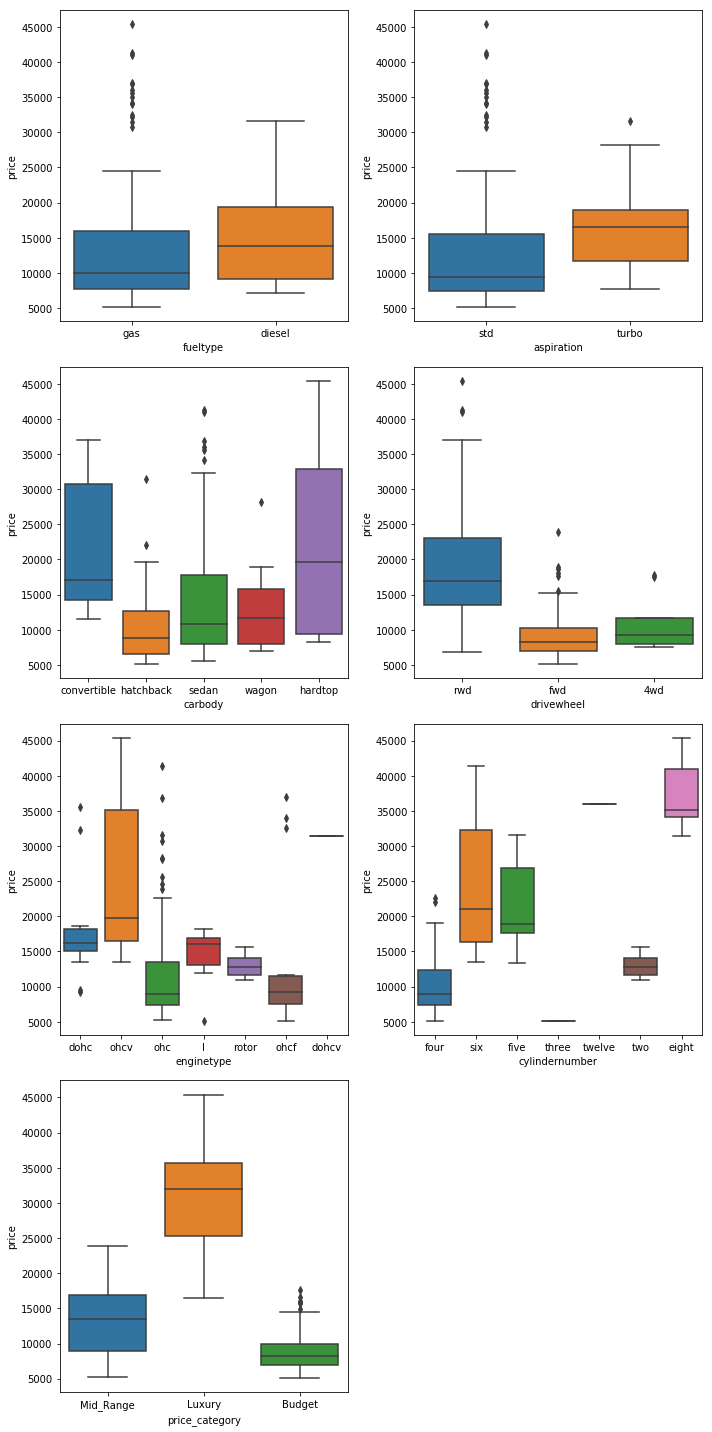

In [49]:
plt.figure(figsize=(10, 20))
plt.subplot(4,2,1)
sns.boxplot(x = 'fueltype', y = 'price', data = CarPrices)
plt.subplot(4,2,2)
sns.boxplot(x = 'aspiration', y = 'price', data = CarPrices)
plt.subplot(4,2,3)
sns.boxplot(x = 'carbody', y = 'price', data = CarPrices)
plt.subplot(4,2,4)
sns.boxplot(x = 'drivewheel', y = 'price', data = CarPrices)
plt.subplot(4,2,5)
sns.boxplot(x = 'enginetype', y = 'price', data = CarPrices)
plt.subplot(4,2,6)
sns.boxplot(x = 'cylindernumber', y = 'price', data = CarPrices)
plt.subplot(4,2,7)
sns.boxplot(x = 'price_category', y = 'price', data = CarPrices)
plt.tight_layout()
plt.show

###### Data Preparation

- You can see that your dataset has many columns with values as String.

- But in order to fit a regression line, we would need numerical values and not string. Hence, we need to convert them to 1s and 0s.

##### Dummy Variable
Categorical Variables are converted into Neumerical Variables with the help of Dummy Variable

In [50]:
fuel_type = pd.get_dummies(automobile['fueltype'], drop_first = True)
automobile = pd.concat([automobile, fuel_type], axis = 1)

asp = pd.get_dummies(automobile['aspiration'], drop_first = True)
automobile = pd.concat([automobile, asp], axis = 1)

car_body = pd.get_dummies(automobile['carbody'],drop_first = True)
automobile = pd.concat([automobile, car_body], axis = 1)

drv_wheel = pd.get_dummies(automobile['drivewheel'], drop_first = True)
automobile = pd.concat([automobile, drv_wheel], axis = 1)

engn_type = pd.get_dummies(automobile['enginetype'], drop_first = True)
automobile = pd.concat([automobile, engn_type], axis = 1)

cyl_no = pd.get_dummies(automobile['cylindernumber'], drop_first = True)
automobile = pd.concat([automobile, cyl_no], axis = 1)

pr_ctgry = pd.get_dummies(automobile['price_category'], drop_first = True)
automobile = pd.concat([automobile, pr_ctgry], axis = 1)

In [53]:
automobile.drop(['fueltype', 'aspiration', 'carbody', 'drivewheel', 'enginetype', 'cylindernumber', 'price_category'], axis = 1, inplace = True)

In [54]:
automobile.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Luxury,Mid_Range
0,88,168,64,2548,130,3,111,13495,23.70,1,...,0,0,0,1,0,0,0,0,0,1
1,88,168,64,2548,130,3,111,16500,23.70,1,...,0,0,0,1,0,0,0,0,0,1
2,94,171,65,2823,152,2,154,16500,22.15,1,...,1,0,0,0,1,0,0,0,0,1
3,99,176,66,2337,109,3,102,13950,26.70,1,...,0,0,0,1,0,0,0,0,0,1
4,99,176,66,2824,136,3,115,17450,19.80,1,...,0,0,1,0,0,0,0,0,0,1


# step 3: Model Building

#### split the data into Train and Test

In [55]:
from sklearn.model_selection import train_test_split

In [57]:
# We specify this so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train, df_test = train_test_split(automobile, train_size = 0.7, test_size = 0.3, random_state = 100)

### Rescaling the Features 

As you saw in the demonstration for Simple Linear Regression, scaling doesn't impact your model. Here we can see that except for `area`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale. As you know, there are two common ways of rescaling:

1. Min-Max scaling 
2. Standardisation (mean-0, sigma-1) 

This time, we will use MinMax scaling.

In [59]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

In [60]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_train[num_vars] = scaler.fit_transform(df_train[num_vars])

C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int32, int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)
C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item

In [61]:
df_train.head()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Luxury,Mid_Range
122,0.241379,0.426230,0.250000,0.272692,0.139623,0.0,0.083333,0.068818,0.530864,1,...,0,0,0,1,0,0,0,0,0,0
125,0.275862,0.442623,0.666667,0.500388,0.339623,1.0,0.395833,0.466890,0.213992,1,...,0,0,0,1,0,0,0,0,1,0
166,0.275862,0.442623,0.333333,0.314973,0.139623,1.0,0.266667,0.122110,0.344307,1,...,0,0,0,1,0,0,0,0,0,0
1,0.068966,0.442623,0.333333,0.411171,0.260377,1.0,0.262500,0.314446,0.244170,1,...,0,0,0,1,0,0,0,0,0,1
199,0.620690,0.770492,0.583333,0.647401,0.260377,1.0,0.475000,0.382131,0.122085,1,...,0,0,0,1,0,0,0,0,0,1


In [62]:
df_train.describe()

,wheelbase,carlength,carwidth,curbweight,enginesize,boreratio,horsepower,price,mileage,gas,...,ohcv,rotor,five,four,six,three,twelve,two,Luxury,Mid_Range
count,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,...,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000,143.000000
mean,0.416204,0.523329,0.443473,0.407878,0.241351,0.881119,0.227302,0.219309,0.358265,0.909091,...,0.062937,0.027972,0.062937,0.741259,0.132867,0.006993,0.006993,0.027972,0.118881,0.412587
std,0.207569,0.205069,0.185445,0.211269,0.154619,0.324786,0.165511,0.215682,0.185980,0.288490,...,0.243703,0.165472,0.243703,0.439483,0.340624,0.083624,0.083624,0.165472,0.324786,0.494030
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.275862,0.393443,0.291667,0.245539,0.135849,1.000000,0.091667,0.067298,0.198903,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.344828,0.508197,0.416667,0.355702,0.184906,1.000000,0.191667,0.140343,0.344307,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.517241,0.672131,0.500000,0.559542,0.301887,1.000000,0.283333,0.313479,0.512346,1.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


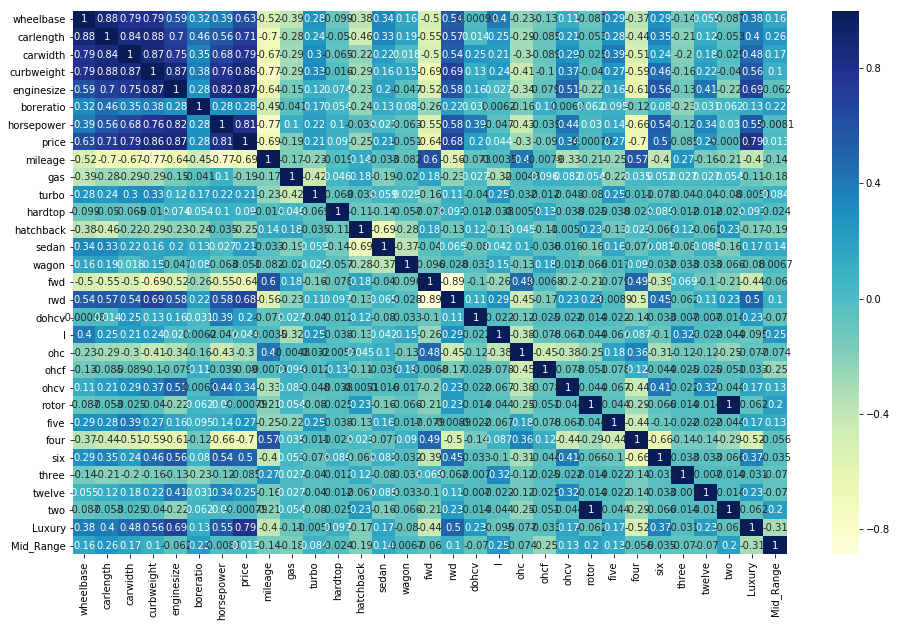

In [63]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

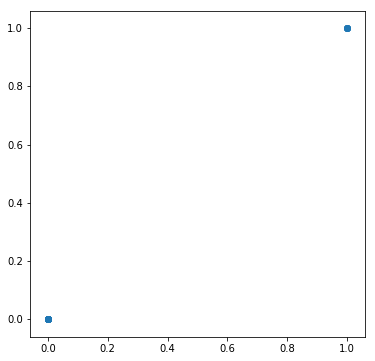

In [64]:
plt.figure(figsize=[6,6])
plt.scatter(df_train.rotor, df_train.two)
plt.show()

### Dividing into X and Y sets for the model building

In [65]:
y_train = df_train.pop('price')
X_train = df_train

#### RFE
Recursive feature elimination

In [66]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [67]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm, 10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [68]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('wheelbase', False, 2),
 ('carlength', False, 13),
 ('carwidth', True, 1),
 ('curbweight', True, 1),
 ('enginesize', True, 1),
 ('boreratio', False, 17),
 ('horsepower', True, 1),
 ('mileage', True, 1),
 ('gas', False, 18),
 ('turbo', False, 21),
 ('hardtop', False, 3),
 ('hatchback', True, 1),
 ('sedan', True, 1),
 ('wagon', True, 1),
 ('fwd', False, 16),
 ('rwd', False, 20),
 ('dohcv', True, 1),
 ('l', False, 19),
 ('ohc', False, 6),
 ('ohcf', False, 7),
 ('ohcv', False, 10),
 ('rotor', False, 15),
 ('five', False, 5),
 ('four', False, 4),
 ('six', False, 9),
 ('three', False, 11),
 ('twelve', False, 8),
 ('two', False, 12),
 ('Luxury', True, 1),
 ('Mid_Range', False, 14)]

In [84]:
col = X_train.columns[rfe.support_]
col

Index(['carwidth', 'curbweight', 'enginesize', 'horsepower', 'mileage',
       'hatchback', 'sedan', 'wagon', 'dohcv', 'Luxury'],
      dtype='object')

In [85]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [86]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [87]:
lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.927
Model:                            OLS   Adj. R-squared:                  0.922
Method:                 Least Squares   F-statistic:                     168.6
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           4.61e-70
Time:                        23:25:32   Log-Likelihood:                 204.46
No. Observations:                 143   AIC:                            -386.9
Df Residuals:                     132   BIC:                            -354.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0962      0.043     -2.245      0.0

In [88]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,72.17
2,curbweight,11.06
3,enginesize,8.98
4,horsepower,7.73
7,sedan,6.09
6,hatchback,5.74
1,carwidth,4.91
5,mileage,4.38
8,wagon,3.74
10,Luxury,2.01


In [89]:
# Dropping enginesize as p-value is high.
X_train_new1 = X_train_rfe.drop(["enginesize"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new1)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.925
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     182.0
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           3.00e-70
Time:                        23:25:55   Log-Likelihood:                 202.06
No. Observations:                 143   AIC:                            -384.1
Df Residuals:                     133   BIC:                            -354.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0726      0.042     -1.733      0.0

C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [90]:
# Dropping mileage as p value is high.
X_train_new2 = X_train_new1.drop(["mileage"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new2)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.924
Model:                            OLS   Adj. R-squared:                  0.919
Method:                 Least Squares   F-statistic:                     203.0
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           5.38e-71
Time:                        23:26:06   Log-Likelihood:                 201.01
No. Observations:                 143   AIC:                            -384.0
Df Residuals:                     134   BIC:                            -357.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0270      0.027     -1.018      0.3

In [91]:
# Dropping sedan as p value is high.
X_train_new3 = X_train_new2.drop(["sedan"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new3)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.920
Model:                            OLS   Adj. R-squared:                  0.916
Method:                 Least Squares   F-statistic:                     222.1
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           8.25e-71
Time:                        23:26:20   Log-Likelihood:                 197.62
No. Observations:                 143   AIC:                            -379.2
Df Residuals:                     135   BIC:                            -355.5
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0806      0.017     -4.870      0.0

In [92]:
# Dropping hatchback as p value is high.
X_train_new4 = X_train_new3.drop(["hatchback"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new4)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.917
Model:                            OLS   Adj. R-squared:                  0.913
Method:                 Least Squares   F-statistic:                     250.4
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           6.50e-71
Time:                        23:26:55   Log-Likelihood:                 194.89
No. Observations:                 143   AIC:                            -375.8
Df Residuals:                     136   BIC:                            -355.0
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0979      0.015     -6.550      0.0

In [93]:
# Dropping wagon as p value is high.
X_train_new5 = X_train_new4.drop(["wagon"], axis = 1)


# Adding a constant variable 
import statsmodels.api as sm  
X_train_lm = sm.add_constant(X_train_new5)

lm = sm.OLS(y_train,X_train_lm).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.915
Model:                            OLS   Adj. R-squared:                  0.912
Method:                 Least Squares   F-statistic:                     293.8
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           2.30e-71
Time:                        23:27:15   Log-Likelihood:                 192.94
No. Observations:                 143   AIC:                            -373.9
Df Residuals:                     137   BIC:                            -356.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1016      0.015     -6.782      0.0

In [94]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new5
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,7.80
2,curbweight,6.41
1,carwidth,4.43
3,horsepower,3.10
5,Luxury,1.56
4,dohcv,1.42


#### Residual Analysis of the train data
So, now to check if the error terms are also normally distributed (which is infact, one of the major assumptions of linear regression), let us plot the histogram of the error terms and see what it looks like.

In [96]:
y_train_price = lm.predict(X_train_lm)

Text(0.5, 0, 'Errors')

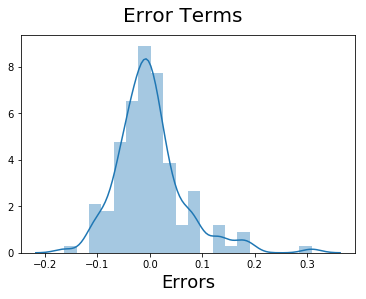

In [97]:
# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_price), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

##### Making Predictions
Applying the scaling on the test sets

In [98]:
num_vars = ['wheelbase', 'carlength', 'carwidth', 'curbweight', 'enginesize','boreratio', 'horsepower', 'price','mileage']

df_test[num_vars] = scaler.transform(df_test[num_vars])

C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [99]:
y_test = df_test.pop('price')
X_test = df_test

In [100]:
# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[['carwidth', 'horsepower', 'Luxury', 'hatchback']]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

C:\Users\Vishnu Kant Shukla\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [101]:
# Making predictions
y_pred = lm.predict(X_test_new)

# Step 4: Model Evaluation

In [102]:
from sklearn.metrics import r2_score 
r2_score(y_test, y_pred)

0.3174560162823704

Text(0, 0.5, 'y_pred')

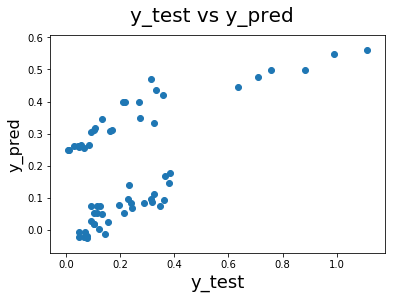

In [103]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading 
plt.xlabel('y_test', fontsize=18)                          # X-label
plt.ylabel('y_pred', fontsize=16)                          # Y-label

##### We can see that the equation of our best fitted line is:

###### price = 0.2199 carwidth +0.2642 curbweight + 0.3704 Horsepower - -0.2332 dohcv +  0.2782 Luxury